## Cleaning Data

Now that the data is understood, we have to look for \
the quality of the sensor data and *manipulate/repair/augument*
the data to be useful for later training


### Removing NaNs

The first step is to check for *NaN* values. Episodes where \
a sensor did not send any data. Not to confuse with *zero values* \
which could mean that the value is *zero*.

Some questions to ask :

1. How much of the data is **NaN**?
2. Is it only **a few** sensors, or do **most** of them have **NaNs**?
3. Do **some sensors** have much more **NaNs** than **others**?
4. Are the **NaNs clustered** together or **spread**?
5. Can we **fill** the **NaNs** or do we have to **delete** them?

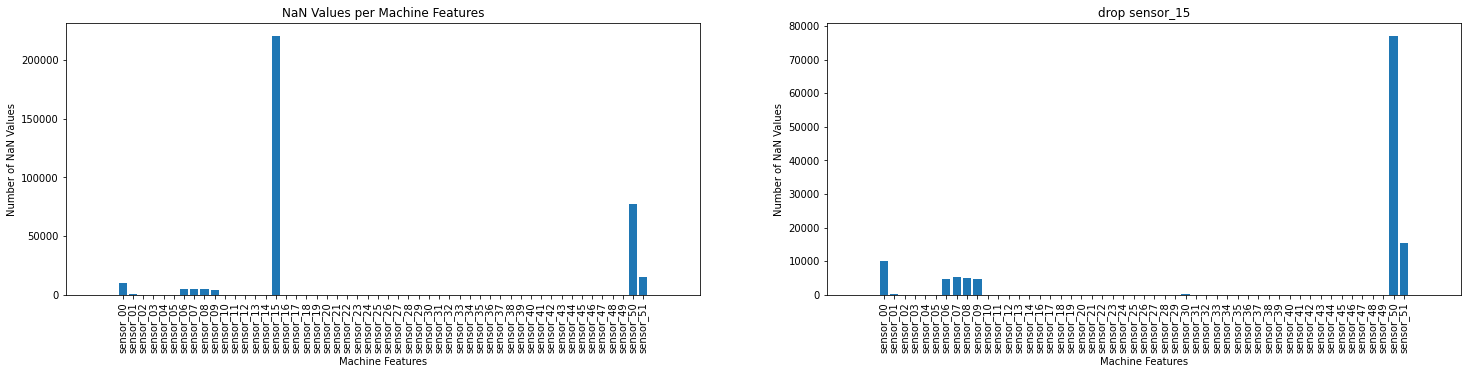

In [2]:
import pandas as pd
import sys
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt


data = data_csv = pd.read_csv('.\..\pump_data\pump_sensor.csv') # read data from csv file

columns_to_drop = ['timestamp', 'machine_status', 'Unnamed: 0']
nan_data = data_csv.drop(columns_to_drop,  axis=1)

fig, axes = plt.subplots(1, 2, figsize=(25, 5))
# fig, axes = plt.subplots(1, 2, figsize=(10, 10))

nan_data_all = nan_data.isna().sum()
axes[0].bar(nan_data_all.index, nan_data_all.values)
axes[0].set_xlabel('Machine Features')
axes[0].set_ylabel('Number of NaN Values')
axes[0].set_title('NaN Values per Machine Features')

axes[0].tick_params(axis='x', labelrotation=90)
axes[0].margins(x=0.1)

nan_data_drop_15 = nan_data.drop('sensor_15', axis=1).isna().sum()
axes[1].bar(nan_data_drop_15.index, nan_data_drop_15.values)
axes[1].set_xlabel('Machine Features')
axes[1].set_ylabel('Number of NaN Values')
axes[1].set_title('drop sensor_15')

axes[1].tick_params(axis='x', labelrotation=90)
axes[1].margins(x=0.1)

plt.show()

We can now simply remove all *NaNs* from the data, \
however, we would lose about *77000 timesteps*, which \
would be roughly *35%*. Therefore, we try to remove as \
many *NaNs sensor by sensor*.

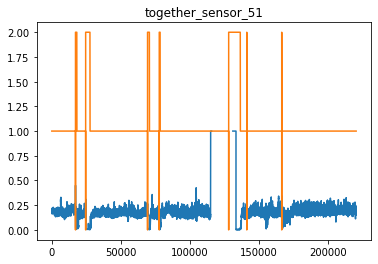

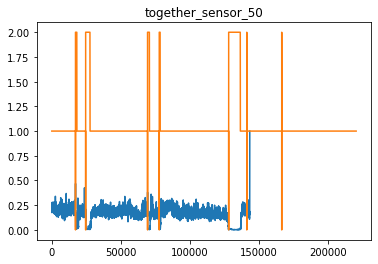

In [3]:
# take the values out of columns 51 and scale them to values between 0 and 1
scaled_sensor_51 = preprocessing.minmax_scale(data_csv['sensor_51'].values)
scaled_sensor_50 = preprocessing.minmax_scale(data_csv['sensor_50'].values)

data_status = data['machine_status'] # get the target data
le = preprocessing.LabelEncoder() # get the label encoder
data = np.array(data_status) # get the target data
le.fit(data.flatten()) # fit the encoder to the data, flatten() is used to make the data 1D
encoded_y = pd.DataFrame(le.transform(data), columns=['target'])

x = np.linspace(1, len(encoded_y), len(encoded_y))
plt.plot(data_csv['sensor_51'].index, scaled_sensor_51)
plt.plot(x, encoded_y)
plt.title('together_sensor_51')
plt.show()

plt.plot(data_csv['sensor_50'].index, scaled_sensor_50)
plt.plot(x, encoded_y)
plt.title('together_sensor_50')
plt.show()

If we look at the next largest holder of NaNs, we see \
the *sensors 50 and 51*. We can see several things. First, \
Sensor 50 just gives out at some point. So we will *remove* \
*sensor 50*. The other option here would be to remove all \
data from all sensors from time step ~140000 onwards… \
So not really an option (in other cases it might actually be the only option).